In [3]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
mouse_clinical_combine = pd.merge(clinical_trial, mouse_drug,how='outer', on="Mouse ID")


# Display the data table for preview
mouse_clinical_combine.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


In [4]:
#get a basic idea of the combined data set 
mouse_clinical_combine.describe()


,Timepoint,Tumor Volume (mm3),Metastatic Sites
count,1906.000000,1906.000000,1906.000000
mean,19.538300,50.468120,1.018363
std,14.064786,8.869571,1.135991
min,0.000000,22.050126,0.000000
25%,5.000000,45.000000,0.000000
50%,20.000000,48.991921,1.000000
75%,30.000000,56.288484,2.000000
max,45.000000,78.567014,4.000000


## Tumor Response to Treatment

In [5]:
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
combine_group_mean = mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()
combine_group_mean.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_mean_df = pd.DataFrame(combine_group_mean)

# Preview DataFrame 
tumor_response_mean_df.head()

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174


In [6]:
tumor_response_mean_df

,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,Capomulin,0,45.000000,0.000000
1,Capomulin,5,44.266086,0.160000
2,Capomulin,10,43.084291,0.320000
3,Capomulin,15,42.064317,0.375000
4,Capomulin,20,40.716325,0.652174
...,...,...,...,...
95,Zoniferol,25,55.432935,1.687500
96,Zoniferol,30,57.713531,1.933333
97,Zoniferol,35,60.089372,2.285714
98,Zoniferol,40,62.916692,2.785714


In [7]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
combine_group_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()
combine_group_sem.reset_index(level = None, inplace = True)

# Convert to DataFrame
tumor_response_sem_tumorvol_df = pd.DataFrame(combine_group_sem)

In [8]:
# Preview DataFrame 
tumor_response_sem_tumorvol_df.head()


,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [9]:
#Syntax: DataFrame.pivot(index=None, columns=None, values=None)[source]
# Minor Data Munging to Re-Format the Data Frames
pivot_table = tumor_response_mean_df.pivot(index ="Timepoint", columns = 'Drug', values = "Tumor Volume (mm3)")
pivot_table.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [48]:
table_fourdrugs = pivot_table[["Timepoint", "Capomulin", 
                               "Infubinol", "Ketapril", "Naftisol", 
                               "Placebo", "Propriva", "Ramicane",
                              "Stelasyn", "Zoniferol"]]
table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
1,5,44.266086,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
2,10,43.084291,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
3,15,42.064317,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
4,20,40.716325,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


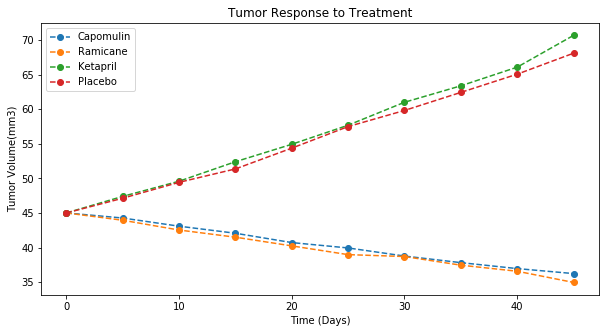

In [82]:
# Generate the Plot (with Error Bars)

# Save the Figure

# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

#fig=table_fourdrugs.plot(kind='scatter', x='Timepoint',y='Capomulin', linestyle='--', color='red', marker='o',yerr = Capomulin_error);

plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Capomulin'], 
             yerr=None, linestyle="--", fmt='o', label = 'Capomulin')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Ramicane'], 
             yerr=None, linestyle="--", fmt='o', label = 'Ramicane')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Ketapril'], 
             yerr=None, linestyle="--",fmt='o', label = 'Ketapril')
plt.errorbar(x=table_fourdrugs['Timepoint'],y=table_fourdrugs['Placebo'], 
             yerr=None, linestyle="--", fmt='o', label = 'Placebo')

plt.ylabel('Tumor Volume(mm3)')
plt.xlabel('Time (Days)')
plt.title('Tumor Response to Treatment')
plt.legend()       
plt.show()


In [12]:
# Show the Figure
plt.show()

![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [13]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
combine_group_mean_met= mouse_clinical_combine.groupby(["Drug","Timepoint"]).mean()

# Convert to DataFrame
met_response_mean_df = pd.DataFrame(combine_group_mean_met["Metastatic Sites"])


In [14]:
# Preview DataFrame 
met_response_mean_df.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [15]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
combine_group_met_sem = mouse_clinical_combine.groupby(["Drug","Timepoint"]).sem()

# Convert to DataFrame
met_response_sem_df = pd.DataFrame(combine_group_sem)


In [16]:
# Preview DataFrame
met_response_sem_df.head()

,Drug,Timepoint,Metastatic Sites,Mouse ID,Tumor Volume (mm3)
0,Capomulin,0,0.000000,NaN,0.000000
1,Capomulin,5,0.074833,NaN,0.448593
2,Capomulin,10,0.125433,NaN,0.702684
3,Capomulin,15,0.132048,NaN,0.838617
4,Capomulin,20,0.161621,NaN,0.909731


In [17]:
# Minor Data Munging to Re-Format the Data Frames
# Preview that Reformatting worked
# Store the Mean "Tumor Volume Data" Grouped by Drug and Timepoint 
met_response_mean_df.reset_index(level = None, inplace = True)
met_response_mean_df2 = pd.DataFrame(combine_group_mean)


pivot_table_met = met_response_mean_df2.pivot(index ="Timepoint", columns = 'Drug', values = "Metastatic Sites")
pivot_table_met.reset_index(level = None, inplace = True)


In [21]:
#Preview the formatted table
pivot_table_met.head()

Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [64]:
met_table_fourdrugs = pivot_table_met[["Timepoint", "Capomulin", "Infubinol", "Ketapril", "Naftisol",  "Placebo","Propriva", "Ramicane", "Stelasyn", "Zoniferol"]]
met_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.160000,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
2,10,0.320000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
3,15,0.375000,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
4,20,0.652174,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


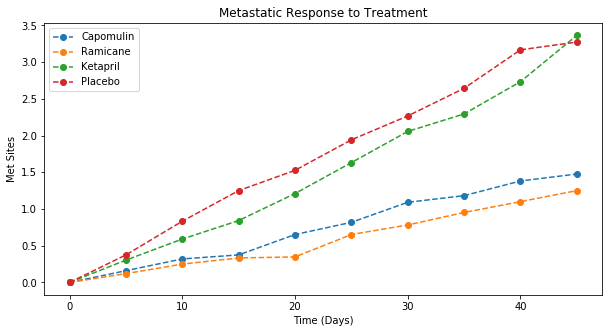

In [83]:
# Generate the Plot (with Error Bars)
plt.figure(figsize = (10, 5))

plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Capomulin'], 
             yerr=None, linestyle="--", fmt='o', label='Capomulin')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ramicane'], 
             yerr=None, linestyle="--", fmt='o', label = 'Ramicane')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Ketapril'], 
             yerr=None, linestyle="--",fmt='o', label = 'Ketapril')
plt.errorbar(x=met_table_fourdrugs['Timepoint'],y=met_table_fourdrugs['Placebo'], 
             yerr=None, linestyle="--", fmt='o', label = 'Placebo')

plt.ylabel("Met Sites")
plt.xlabel('Time (Days)')
plt.title('Metastatic Response to Treatment')
plt.legend()       
plt.show()

# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [41]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
micecount=mouse_clinical_combine.groupby(["Drug","Timepoint"]).count()

# Convert to DataFrame
micecount_df=pd.DataFrame(micecount["Mouse ID"])
micecount_df.reset_index(inplace=True)

# Preview DataFrame
micecount_df.head()


,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [84]:
mice_table_fourdrugs = pivot_table_mice[["Timepoint", "Capomulin", "Ramicane", "Ketapril", "Placebo"]]
mice_table_fourdrugs.head()

Drug,Timepoint,Capomulin,Ramicane,Ketapril,Placebo
0,0,25,25,25,25
1,5,25,25,23,24
2,10,25,24,22,24
3,15,24,24,19,20
4,20,23,23,19,19


In [85]:
#Calculations ffor the survival rate

survival_fourdrugs_df = mice_table_fourdrugs.astype(float)
survival_fourdrugs_df["Capomulin_percent"]=survival_fourdrugs_df["Capomulin"]/survival_fourdrugs_df["Capomulin"].iloc[0] * 100
survival_fourdrugs_df["Ramicane_percent"]=survival_fourdrugs_df["Ramicane"]/survival_fourdrugs_df["Ramicane"].iloc[0] * 100
survival_fourdrugs_df["Ketapril_percent"]=survival_fourdrugs_df["Ketapril"]/survival_fourdrugs_df["Ketapril"].iloc[0] * 100
survival_fourdrugs_df["Placebo_percent"]=survival_fourdrugs_df["Placebo"]/survival_fourdrugs_df["Placebo"].iloc[0] * 100
survival_fourdrugs_df

Drug,Timepoint,Capomulin,Ramicane,Ketapril,Placebo,Capomulin_percent,Ramicane_percent,Ketapril_percent,Placebo_percent
0,0.0,25.0,25.0,25.0,25.0,100.0,100.0,100.0,100.0
1,5.0,25.0,25.0,23.0,24.0,100.0,100.0,92.0,96.0
2,10.0,25.0,24.0,22.0,24.0,100.0,96.0,88.0,96.0
3,15.0,24.0,24.0,19.0,20.0,96.0,96.0,76.0,80.0
4,20.0,23.0,23.0,19.0,19.0,92.0,92.0,76.0,76.0
5,25.0,22.0,23.0,19.0,17.0,88.0,92.0,76.0,68.0
6,30.0,22.0,23.0,18.0,15.0,88.0,92.0,72.0,60.0
7,35.0,22.0,21.0,17.0,14.0,88.0,84.0,68.0,56.0
8,40.0,21.0,20.0,15.0,12.0,84.0,80.0,60.0,48.0
9,45.0,21.0,20.0,11.0,11.0,84.0,80.0,44.0,44.0


In [44]:
# Minor Data Munging to Re-Format the Data Frames
pivot_table_mice = micecount_df.pivot(index ="Timepoint", columns = 'Drug', values = "Mouse ID")
pivot_table_mice.reset_index(level = None, inplace = True)

#Preview the formatted table
pivot_table_mice.head()


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,25,25,25,25,25,25,26,25,26,25
1,5,25,21,25,23,23,24,25,25,25,24
2,10,25,20,21,22,21,24,23,24,23,22
3,15,24,19,21,19,21,20,17,24,23,21
4,20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


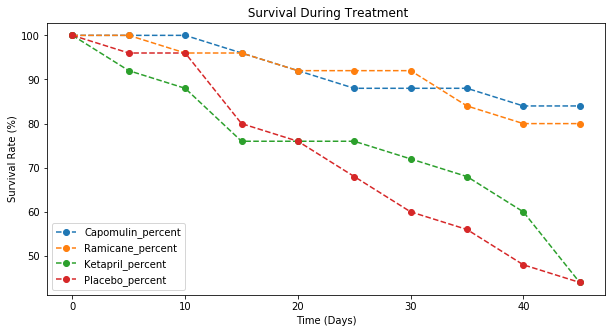

In [86]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
plt.figure(figsize = (10, 5))


plt.errorbar(x=survival_fourdrugs_df ['Timepoint'],y=survival_fourdrugs_df['Capomulin_percent'], 
             linestyle="--", fmt='o', label = 'Capomulin_percent')
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Ramicane_percent'], 
             linestyle="--", fmt='o', label = 'Ramicane_percent')
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Ketapril_percent'], 
             linestyle="--",fmt='o', label = 'Ketapril_percent')
plt.errorbar(x=survival_fourdrugs_df['Timepoint'],y=survival_fourdrugs_df['Placebo_percent'], 
             linestyle="--", fmt='o', label = 'Placebo_percent')

plt.ylabel("Survival Rate (%)")
plt.xlabel('Time (Days)')
plt.title(' Survival During Treatment')
plt.legend()       
plt.show()



# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [74]:
# Calculate the percent changes for each drug
Capomulin_percent=(table_fourdrugs["Capomulin"].iloc[9]-table_fourdrugs["Capomulin"].iloc[0])/table_fourdrugs["Capomulin"].iloc[0]*100
Infubinol_percent=(table_fourdrugs["Infubinol"].iloc[9]-table_fourdrugs["Infubinol"].iloc[0])/table_fourdrugs["Infubinol"].iloc[0]*100
Ketapril_percent=(table_fourdrugs["Ketapril"].iloc[9]-table_fourdrugs["Ketapril"].iloc[0])/table_fourdrugs["Ketapril"].iloc[0]*100
Naftisol_percent=(table_fourdrugs["Naftisol"].iloc[9]-table_fourdrugs["Naftisol"].iloc[0])/table_fourdrugs["Naftisol"].iloc[0]*100
Placebo_percent=(table_fourdrugs["Placebo"].iloc[9]-table_fourdrugs["Placebo"].iloc[0])/table_fourdrugs["Placebo"].iloc[0]*100
Propriva_percent=(table_fourdrugs["Propriva"].iloc[9]-table_fourdrugs["Propriva"].iloc[0])/table_fourdrugs["Propriva"].iloc[0]*100
Ramicane_percent=(table_fourdrugs["Ramicane"].iloc[9]-table_fourdrugs["Ramicane"].iloc[0])/table_fourdrugs["Ramicane"].iloc[0]*100
Stelasyn_percent=(table_fourdrugs["Stelasyn"].iloc[9]-table_fourdrugs["Stelasyn"].iloc[0])/table_fourdrugs["Stelasyn"].iloc[0]*100
Zoniferol_percent=(table_fourdrugs["Zoniferol"].iloc[9]-table_fourdrugs["Zoniferol"].iloc[0])/table_fourdrugs["Zoniferol"].iloc[0]*100

# Store all Relevant Percent Changes into a Tuple
percent_tuple = {'Capomulin': Capomulin_percent, 
                 'Ketapril': Ketapril_percent, 
                 'Placebo': Placebo_percent,
                 'Propriva': Propriva_percent,
                 'Ramicane': Ramicane_percent,
                 'Stelasyn': Stelasyn_percent,
                }
percentchange_tumorvolume = pd.Series(percent_tuple)

percentchange_tumorvolume


Capomulin   -19.475303
Ketapril     57.028795
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
dtype: float64

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [75]:
testdrugs=percentchange_tumorvolume.keys()
testdrugs

Index(['Capomulin', 'Ketapril', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn'], dtype='object')

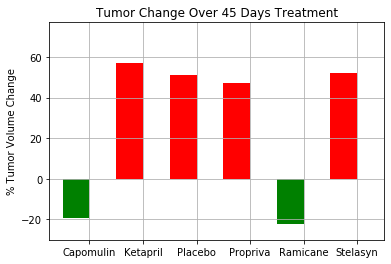

In [81]:
# Splice the data between passing and failing drugs
summary_bar = plt.subplot()
x_axis = np.arange(0, len(testdrugs))

# Orient widths. Add labels, tick marks, etc. 
tick_locations = []
tick_locations = []
for x in x_axis:
    tick_locations.append(x + 0.5)
plt.xticks(tick_locations, testdrugs)
colors = []
for value in percentchange_tumorvolume:
    if value >= 0 :
        colors.append('r')
    else:
        colors.append('g')

# Use functions to label the percentages of changes
# Call functions to implement the function calls
# Save the Figure

percent_change = summary_bar.bar(x_axis, 
                                 percentchange_tumorvolume, 
                                 color=colors, align="edge", width = .5)

plt.title("Tumor Change Over 45 Days Treatment")
plt.ylabel("% Tumor Volume Change")
plt.xlim(-0.25, len(testdrugs))
plt.ylim(-30, max(percentchange_tumorvolume) + 20)
plt.grid()

# Show the Figure
plt.show()


In [ ]:
# Based on the results of the study, its seems as though 
# Capomulin & Ramicane are promising for human test trials
# The remainng drugs are not very effective in redcuing squamous cell carcinoma (SCC).
# The mice responded to treatment from these two drugs much better than the others including Placebo
# Although more mice survived the treatment of Capomulin than Ramicane
# Possibly due to the lenght in treatment. As treatments increase, the survival rate decreases for Ramicane
# Therefore, Capomulin may be more stable and may have more posibilities in human trials

![Metastatic Spread During Treatment](../Images/change.png)